# Nutritional Data Analysis

### Project overview

We will perform a full EDA (Exploratory data Analysis) on a food products dataset to assess the nutritional characteristics of food products sold in France. The project is divided in two parts:
- **1. Data cleaning and pre-processing:** Starting from a big dataset on worldwide food products we will extract a smaller dataset for further analysis
- **2. Exploratory Data Analysis:** Descriptive statistics on food products sold in France

The initial dataset was collected from [Open Food Facts website](https://world.openfoodfacts.org/). Open Food Facts gathers numerous information (nutritional data, packagaging...) on food products from around the world. The database is huge but collected data are also potentially very messy (duplicates, typos, missing data...) which makes this dataset a good source for a cleaning and pre-processing data project. Information describing the fields of the dataset can be found [here](https://world.openfoodfacts.org/data/data-fields.txt).

## Required modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Cleaning and pre-processing

In [2]:
donnees = pd.read_csv("../external_data/fr.openfoodfacts.org.products.csv",
                  sep='\t',low_memory=False )
print(donnees.shape)

(320772, 162)


In [3]:
donnees.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I don't share the initial dataset on this repository because of its size (~800 Mo) but you can easily build your own dataset from [Open Food Facts website](https://world.openfoodfacts.org/). The smaller dataset (that will be used in the second part of this notebook) obtained after the cleaning operations can be found in the */data* folder of this repository

This dataset has 320,772 lines and 162 columns, let's see how we can prune it for our data analysis project!

### Selection of products sold in France

First, we will select only the part of the dataset with products sold in France, using the 'countries_fr' column

In [4]:
def search_france(liste):
    '''Returns France if word is in the list,
    other otherwise'''
    for pays in str(liste).split(','):
        if pays == 'France':
            return 'France'
        return 'other'

selec = donnees['countries_fr'].apply(search_france)
donnees_fr = donnees.loc[selec[selec == 'France'].index,]

print('Selected lines:',donnees_fr.shape[0])

Selected lines: 97448


### Selection of columns

We are primarily interested in variables describing the nutritional characteristics of the products. We will also exclude variables containing too many NA as they won't be very informative for our analysis

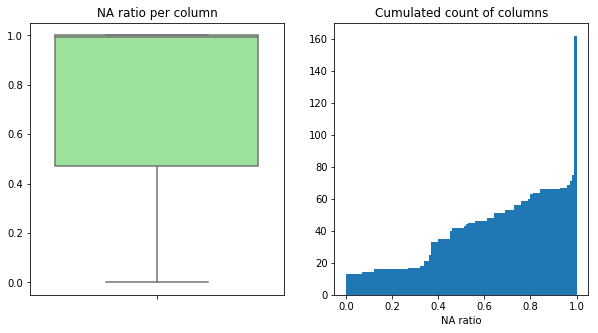

In [5]:
nb_lines = donnees_fr.shape[0]
na_ratio_per_column = pd.isnull(donnees_fr).sum(axis=0)/nb_lines

fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#using seaborn for easier control of color parameter
sns.boxplot( na_ratio_per_column, color="lightgreen", orient='v')
plt.title("NA ratio per column")
plt.subplot(1,2,2)
plt.hist(na_ratio_per_column, bins=100, cumulative=True);
plt.title("Cumulated count of columns")
plt.xlabel('NA ratio')
plt.show()

Among the 162 columns, most have a high ratio of empty cells. 
If I set a low threshold to keep only variables with no more than let's say 25% of empty cells I will obtain less than 20 variables. After a few attempts, I set a threshold at 55% of empty cells maximum. This is a quite high value but allows to retain such variables like
*'fat_100g'*, *carbohydrates_100g'* and *'fiber_100g'*
which are variables of interest for the analysis. This way, we'll have data on the 3 main macro-nutrients:
- carbohydrates,
- fats and
- proteins

In [6]:
set_threshold = 0.55
print('Number of columns with a NA filling ratio less than {}: {}'.format(
    set_threshold,
    len(donnees_fr.loc[:,na_ratio_per_column<0.55].columns)))
print('\n')
print(list(donnees_fr.loc[:,na_ratio_per_column<0.55].columns))

Number of columns with a NA filling ratio less than 0.55: 45


['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'additives_n', 'additives', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']


Among those variables, I will retain only some, potentially useful for the nutritional data analysis project.
First the variables related to nutritional status (*var_num_100g*), then several variables that may be used to label and group our products (*var_id*, *var_cat_txt*, *var_cat_num*)

In [7]:
# id useful to come back to online database if necessary
var_id =[ #(4)
    'code', 'url', 'product_name',  'countries_fr'   
]
# categorical variables (text)
var_cat_txt = [ # (10)
    'packaging' ,'quantity', 'brands',
    'pnns_groups_1', 'pnns_groups_2',
    'ingredients_text'  ,'additives_fr',
    'ingredients_from_palm_oil_tags',
    'ingredients_that_may_be_from_palm_oil_tags',
    'nutrition_grade_fr'
]
# categorical variables (numeric)
var_cat_num = [ # (3)
    'additives_n', 'ingredients_from_palm_oil_n',
    'ingredients_that_may_be_from_palm_oil_n'
]
# Numerical variables: target of the analysis
var_num_100g = [ # (11)
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
    'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g' 
]

retained_var = var_id + var_cat_txt + var_cat_num + var_num_100g

In [8]:
donnees_fr = donnees_fr[retained_var]
print(donnees_fr.shape)
donnees_fr.head()

(97448, 28)


,code,url,product_name,countries_fr,packaging,quantity,brands,pnns_groups_1,pnns_groups_2,ingredients_text,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,Farine de blé noir,France,NaN,1kg,Ferme t'y R'nao,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,Filet de bœuf,France,plastique,2.46 kg,NaN,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,Lion Peanut x2,"France,États-Unis",NaN,NaN,Sunridge,unknown,unknown,"Milk chocolate coating (evaporated cane juice,...",...,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,22.0,22.0
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,Twix x2,France,NaN,NaN,NaN,unknown,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We end up with 28 variables, informative (related to our project) and usable (acceptable filling ratio)

### Selection of lines

Earlier, we have selected lines related to products sold in France.
Now let's have a look at their filling ratio with a focus on our list of 11 target variables listed in *var_num*.

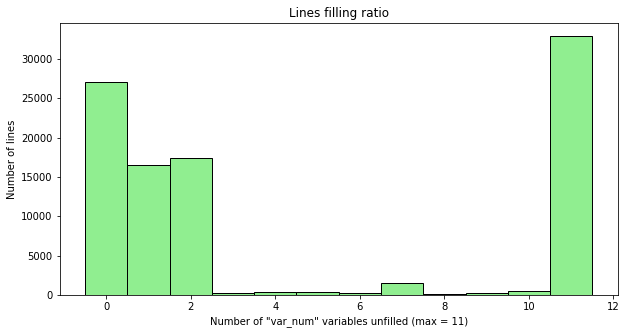

In [9]:
fig = plt.figure(figsize=(10,5))
plt.hist(pd.isnull(donnees_fr[var_num_100g]).sum(axis=1,),
         bins=range(13),
        color='lightgreen', edgecolor='black', align='left')
plt.title('Lines filling ratio')
plt.xlabel('Number of "var_num" variables unfilled (max = 11)')
plt.ylabel('Number of lines')
plt.show()

We have more than 30,000 lines with absolutely no data on the *var_num* variables. We can safely drop these lines as they are useless for our project. Most of the remaining lines have a high filling ratio. For now, we will keep in our dataset the lines with no more than 6 unfilled variables. 

In [10]:
donnees_fr = donnees_fr[ 
    (pd.isnull(donnees_fr[var_num_100g]).sum(axis=1)<7)
    # lines with less than 7 unfilled var_num
    & (pd.isnull(donnees_fr.product_name )==False) 
    # lines with a product name filled
    ]
donnees_fr.shape

(61811, 28)

From our initial 320772 x 162 dataset, we have built a 61811 x 28 dataset, consistent with our goals and with a more manageable size. Are we ready for the analysis part? Not yet, let's have a closer look at our data.

### Formating

Now that we have dropped the part of the dataset that we are sure we won't use we can use some summary methods like `df.describe()` or `df.info()`.
We could have used them at the start but this would have been difficult to interpret on all the 162 initial variables.

In [11]:
donnees_fr.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,41521.000000,41521.00000,41521.000000,6.177300e+04,44604.000000,61281.000000,44537.000000,61315.000000,44998.000000,61650.000000,61381.000000,61380.000000,60289.000000,60289.000000
mean,2.039908,0.07943,0.164182,1.174288e+03,13.239196,5.405988,27.637302,13.312725,2.545855,7.762968,1.157303,0.455637,8.655974,8.339714
std,2.614446,0.27439,0.470051,1.312167e+04,16.903234,8.535862,27.294065,19.006355,4.638588,7.898569,4.257512,1.676141,9.038904,9.375558
min,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.00000,0.000000,4.300000e+02,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000,0.000000
50%,1.000000,0.00000,0.000000,1.035000e+03,6.800000,1.900000,14.500000,4.000000,1.300000,6.000000,0.560000,0.220472,9.000000,7.000000
75%,3.000000,0.00000,0.000000,1.650000e+03,21.000000,7.400000,53.000000,17.200000,3.200000,11.000000,1.250000,0.492126,15.000000,16.000000
max,31.000000,2.00000,5.000000,3.251373e+06,380.000000,210.000000,190.000000,104.000000,178.000000,100.000000,211.000000,83.000000,40.000000,36.000000


In [12]:
donnees_fr.info()
# you could also use
# donnees_fr.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61811 entries, 106 to 320763
Data columns (total 28 columns):
code                                          61811 non-null object
url                                           61811 non-null object
product_name                                  61811 non-null object
countries_fr                                  61811 non-null object
packaging                                     42555 non-null object
quantity                                      46144 non-null object
brands                                        61581 non-null object
pnns_groups_1                                 47612 non-null object
pnns_groups_2                                 47707 non-null object
ingredients_text                              41521 non-null object
additives_fr                                  25754 non-null object
ingredients_from_palm_oil_tags                3253 non-null object
ingredients_that_may_be_from_palm_oil_tags    5393 non-null object
nutrit

The dataset is ordered with categorical variables first (str object) and numerical (float64) at the end. Most variables have a high filling rate.

Prior to analysis, we will search for aberrant data, typos... and standardize the data as much as possible.

### Formating of categorical variables

Among the categorical variables, *'pnns_groups_1'*, *'pnns_groups_2'* seem particularly interesting to label our data:

In [13]:
print('PNNS_groups1:\n',pd.unique(donnees_fr['pnns_groups_1']),'\n')
print('PNNS_groups2:\n',pd.unique(donnees_fr['pnns_groups_2']))

PNNS_groups1:
 ['unknown' nan 'Beverages' 'Sugary snacks' 'Composite foods'
 'Fruits and vegetables' 'Milk and dairy products' 'Salty snacks'
 'Cereals and potatoes' 'Fat and sauces' 'Fish Meat Eggs'
 'fruits-and-vegetables' 'sugary-snacks' 'cereals-and-potatoes'] 

PNNS_groups2:
 ['unknown' nan 'Sweetened beverages' 'Biscuits and cakes' 'One-dish meals'
 'Soups' 'Non-sugared beverages' 'Cheese' 'Sandwich' 'Sweets' 'Appetizers'
 'Dried fruits' 'Nuts' 'Breakfast cereals' 'Pizza pies and quiche'
 'Fruits' 'Fruit juices' 'Cereals' 'Dressings and sauces' 'Vegetables'
 'Bread' 'Chocolate products' 'Processed meat' 'Legumes' 'vegetables'
 'Ice cream' 'pastries' 'Dairy desserts' 'Milk and yogurt' 'Meat'
 'Fish and seafood' 'Fats' 'Artificially sweetened beverages'
 'Fruit nectars' 'Potatoes' 'Alcoholic beverages'
 'Salty and fatty products' 'Tripe dishes' 'Eggs' 'fruits' 'cereals']


We would need only a few tweaks to improve them:
- pass the NA into 'unknown' character string
- regroup the similar categories, e.g. 'Sugary snacks' and 'sugary-snacks'

In [14]:
def format_pnns(pnns):
    '''format pnns1
    Replace NA with 'Unknown'
    Remove '-'
    Capitalize words'''
    new = 'Unknown'
    if isinstance(pnns, str):
        new = pnns.replace('-',' ').capitalize()
    return new

donnees_fr['pnns_groups_1'] = donnees_fr['pnns_groups_1'].apply(format_pnns)
donnees_fr['pnns_groups_2'] = donnees_fr['pnns_groups_2'].apply(format_pnns)

Let's have a look at our categories (pnns1) and sub-categories (pnns2)

In [15]:
donnees_fr[['pnns_groups_1','pnns_groups_2']].drop_duplicates()\
.sort_values(by=['pnns_groups_1'])

,pnns_groups_1,pnns_groups_2
226,Beverages,Sweetened beverages
128703,Beverages,Fruit nectars
664,Beverages,Non sugared beverages
118432,Beverages,Artificially sweetened beverages
13129,Beverages,Fruit juices
22521,Cereals and potatoes,Bread
175429,Cereals and potatoes,Potatoes
14734,Cereals and potatoes,Cereals
29113,Cereals and potatoes,Legumes
12998,Cereals and potatoes,Breakfast cereals


That's much better!
Some unknown pnns1 categories have a known pnns2 sub-category. We can use this to impute a pnns1 value.

In [16]:
def imput_pnns1(pnns):
    '''Impute a Pnns1 category
    if pnns1 is unknown and pnns2 known'''
    pnns1 = pnns[0]
    pnns2 = pnns[1]
    if pnns1 == 'Unknown':
        if pnns2 == 'Alcoholic beverages':
            pnns1 = 'Beverages'
        elif pnns2 ==  'Tripe dishes':
            pnns1 = 'Fish meat eggs'
    pnns[0] = pnns1    
    return pnns

donnees_fr.loc[:,'pnns_groups_1':'pnns_groups_2'] = \
donnees_fr.loc[:,'pnns_groups_1':'pnns_groups_2'].apply(imput_pnns1,axis=1)

In [17]:
donnees_fr[['pnns_groups_1','pnns_groups_2']].drop_duplicates()\
.sort_values(by=['pnns_groups_1'])

,pnns_groups_1,pnns_groups_2
118432,Beverages,Artificially sweetened beverages
226,Beverages,Sweetened beverages
175882,Beverages,Alcoholic beverages
664,Beverages,Non sugared beverages
128703,Beverages,Fruit nectars
13129,Beverages,Fruit juices
175429,Cereals and potatoes,Potatoes
14734,Cereals and potatoes,Cereals
22521,Cereals and potatoes,Bread
29113,Cereals and potatoes,Legumes


### Feature engineering: number of ingredients

The variable *'ingredients_text'* lists the ingredients of a product. We could use it to build a summary variable with the total number of ingredients for a product.

In [18]:
def count_item(items):
    if isinstance(items, str):
        new = items.split(',')
        return len(new)
    else:
        return np.nan

donnees_fr['nb_ingredients'] = \
donnees_fr['ingredients_text'].apply(count_item)

<=1 ingredient: 4675
]1;5] ingredients: 10211
]1;Inf] ingredients: 26635
NAs: 20290


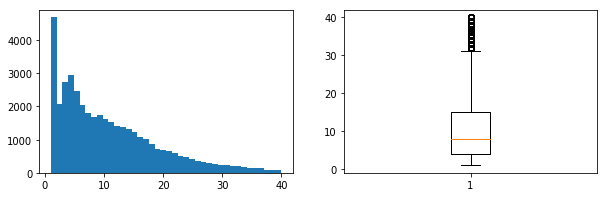

,product_name,ingredients_text,nb_ingredients
106,Lion Peanut x2,"Milk chocolate coating (evaporated cane juice,...",10.0
138,Pack de 2 Twix,NaN,NaN
190,Mini Confettis,NaN,NaN
191,Praliné Amande Et Noisette,NaN,NaN
226,"Pepsi, Nouveau goût !","Eau gazéifiée, sucre, colorant caramel E150d, ...",6.0
234,Tarte Poireaux Et Lardons,NaN,NaN
240,7Up,"Eau gazéifiée, sucre, acidifiants (acide citri...",6.0
242,Madeleines nature,"Farine de _blé_, huile de colza, sucre, _oeufs...",13.0
279,Cakes Raisins,"Farine de _blé_, _œufs_ frais, huile de colza,...",14.0
283,Cakes aux Fruits,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",22.0


In [19]:
tmp = donnees_fr['nb_ingredients']

print('<=1 ingredient:',len(tmp[tmp<=1]))
print(']1;5] ingredients:',len(tmp[tmp<=5])-len(tmp[tmp<=1]))
print(']1;Inf] ingredients:',len(tmp)-len(tmp[tmp<=5])-len(tmp[pd.isnull(tmp)]))
print('NAs:',len(tmp[pd.isnull(tmp)]))

tmp = tmp[pd.isnull(tmp)==False]
fig = plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
plt.hist(tmp[tmp<=40],bins=40)
fig.add_subplot(1,2,2)
plt.boxplot(tmp[tmp<=40])
plt.show()

donnees_fr[['product_name','ingredients_text','nb_ingredients']].head(10)

This new variable 'nb_ingredients' may be used to discriminate for different levels of [food processing](https://en.wikipedia.org/wiki/Food_processing) among products

However it retains several flaws:
- about a third of the data are NA
- it relies on how exhaustive was the user when filling the field 'ingredient_text'
- A split based only on ',' is imprecise due to a mix of French and English languages, different entry formats...

As it is, it can be used to discriminate raw product from processed food but more work would be required to make this variable really insightful

### Checking: variables on additives

(Looking for possible presence of aberrant data)

additives_n  nb NA:  20290
ingredients_from_palm_oil_n  nb NA:  20290
ingredients_that_may_be_from_palm_oil_n  nb NA:  20290


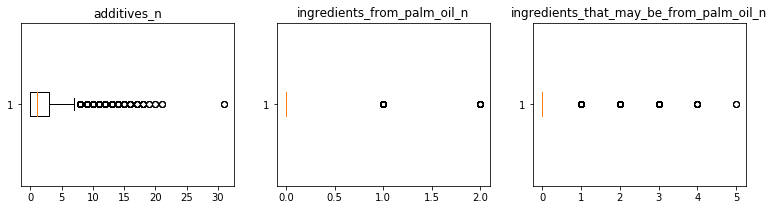

In [20]:
for i in range(3):
    print(var_cat_num[i], ' nb NA: ',
          sum(pd.isnull(donnees_fr[var_cat_num[i]])))

fig = plt.figure(figsize=(13,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.boxplot(donnees_fr[var_cat_num[i]]\
                [pd.isnull(donnees_fr[var_cat_num[i]])==False],vert=False)
    plt.title(var_cat_num[i])
plt.show()

Only a few product have a high number of additives. I suspect that this field was lazily filled... and maybe be not totally accurate. Otherwise, no obvious aberrant data spotted here.

### Numerical variables  *var_num_100g*

We will check carefully those variables

let's start with the **energy content**. From the [file](https://world.openfoodfacts.org/data/data-fields.txt) describing the fields of the dataset, the energy content variable is in kJ. We will convert in kcal

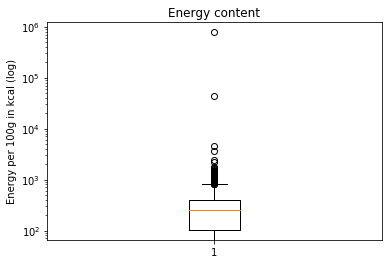

In [21]:
#conversion kJ into kcal
donnees_fr['energy_100g'] = donnees_fr['energy_100g']/4.1868

plt.boxplot(donnees_fr['energy_100g']\
            [pd.isnull(donnees_fr['energy_100g'])==False])
plt.yscale('log')
plt.ylabel('Energy per 100g in kcal (log)')
plt.title('Energy content')
plt.show()

Some outliers are very high. 
After reading some documentation, we can consider
- that values above 1000 kcal per 100g are aberrant
- that values between 700 and 1000 kcal per 100g are possible for a few highly energetic products like butter, oil, almond ...

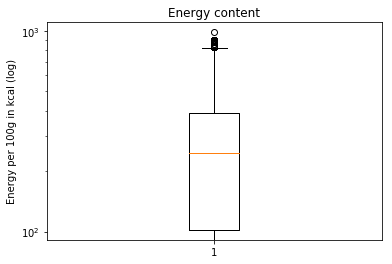

In [22]:
def check_energy(tab):
    #input must contain variables
    #'pnns_groups_1' 'pnns_groups_2' 'energy_100g'
    pnns1 = tab[0]
    pnns2 = tab[1]
    energy = tab[2]
    def imput_e(energy,pnns1,pnns2):
        if energy >=1000:
            return np.NaN
        elif energy >=700:
            if (pnns1!= 'Fat and sauces' and pnns2 !='Dried fruits' 
                    and pnns2!='Nuts'):
                return np.NaN
        return energy
    tab[2] = imput_e(energy,pnns1,pnns2)
    return tab
        
donnees_fr.loc[:,['pnns_groups_1','pnns_groups_2','energy_100g']] = \
    donnees_fr.loc[:,['pnns_groups_1','pnns_groups_2','energy_100g']]\
    .apply(check_energy,axis=1)

plt.boxplot(donnees_fr['energy_100g']\
            [pd.isnull(donnees_fr['energy_100g'])==False])
plt.yscale('log')
plt.ylabel('Energy per 100g in kcal (log)')
plt.title('Energy content')
plt.show()

For the value of **nutrient content**, we will check that all value are between 0 and 100.
Then we'll check if the sum of nutrient contents is plausible for every lines.

In [23]:
# value above 100 are considered as NA
def check_nutri(nutri):
    if nutri > 100:
        nutri = np.NaN
    return nutri

for i in range(8):
    donnees_fr[var_num_100g[i+1]] = \
    donnees_fr[var_num_100g[i+1]].apply(check_nutri)

In [24]:
print('lines with total content of nutrient above 100: ', 
      sum(donnees_fr[['fat_100g','carbohydrates_100g','proteins_100g','salt_100g']].sum(axis=1)>100))
print('lines with total content of nutrient above 110: ',
      sum(donnees_fr[['fat_100g','carbohydrates_100g','proteins_100g','salt_100g']].sum(axis=1)>110))

lines with total content of nutrient above 100:  128
lines with total content of nutrient above 110:  18


We will suppress the lines with a total nutrient content above 110 (and accept an error of 10%)

In [25]:
donnees_fr = donnees_fr[(donnees_fr[[
    'fat_100g','carbohydrates_100g','proteins_100g','salt_100g']]\
    .sum(axis=1)<=110)]
donnees_fr.shape

(61793, 29)

I repeat this procedure for different combinations of nutrient contents which are expected to have a sum lower than 100. I also suppress lines with a total content of nutrient equal to zero.

Here, my goal is to suppress from the dataset the few remaining entries which are obviously aberrant and which weren't suppressed by our previous operations already. This last step is very data-dependent and different strategies may be chosen (for instance an analysis of the vocabulary of the variable 'product_name').

In this case, I have even spotted a few entries for non alimentary products (like DVD or cosmetics!). Those lines had some data for the 'var_num' fields but non realistic values so I chose to base this last checking procedure on the 'var_num' values.

In [26]:
# suppression lines with sum  var_num is 0 
donnees_fr = donnees_fr[donnees_fr[var_num_100g[:9]].sum(axis=1)>0] 
# we repeat the checking formulae fat+carbohydrates+proteins+salt <= 110
# with a replacement of carbohydrates by (sugar+fiber) 
# and/or fat par saturated-fat 
donnees_fr = donnees_fr[donnees_fr[['fat_100g','sugars_100g','fiber_100g',
    'proteins_100g','salt_100g']].sum(axis=1)<=110]
donnees_fr = donnees_fr[donnees_fr[['saturated-fat_100g','sugars_100g',
    'fiber_100g','proteins_100g','salt_100g']].sum(axis=1)<=110]
donnees_fr = donnees_fr[donnees_fr[['saturated-fat_100g',
    'carbohydrates_100g','proteins_100g','salt_100g']].sum(axis=1)<=110]
donnees_fr = donnees_fr[(donnees_fr[['fat_100g','carbohydrates_100g',
    'proteins_100g','sodium_100g']].sum(axis=1)<=110)]
donnees_fr.shape

(61577, 29)

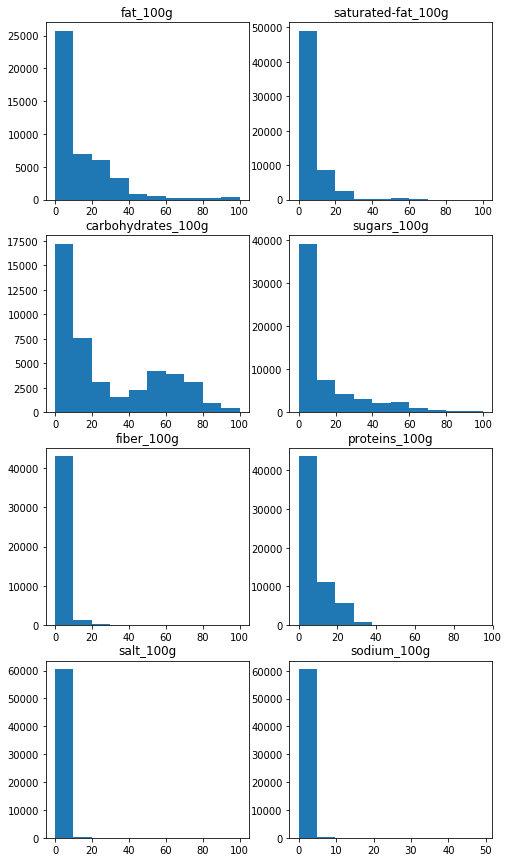

In [27]:
fig = plt.figure(figsize=(8,15))
for i in range(8):
    tmp = donnees_fr[var_num_100g[i+1]]\
        [pd.isnull(donnees_fr[var_num_100g[i+1]])==False]
    plt.subplot(4,2,i+1)
    plt.hist(tmp)
    plt.title(var_num_100g[i+1])
plt.show()

The distributions of nutrient content values are consistent with our expectations.

Now our dataset seems ready for the next step: **part.2: Exploratory Data Analysis**

### Cleaned dataset export

In [46]:
# not run
donnees_fr.to_csv('data/donnees_fr.csv', encoding='utf-8')